/home/nadim/Desktop/ml/mlpractice/test.png


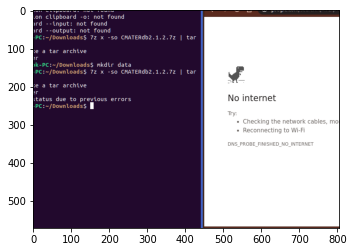

<class 'numpy.ndarray'>
(572, 805, 3)


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import os 
img_path=os.path.join(os.getcwd(),'test.png')
print(img_path)
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()

print(type(img))
print(img.shape)

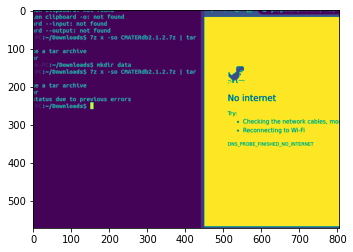

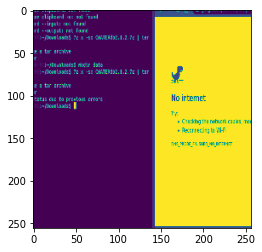

In [2]:
data=img[:,:,0]
plt.imshow(data)
plt.show()
data=cv2.resize(data,(256,256))
plt.imshow(data)
plt.show()
data=np.expand_dims(data,axis=-1)
data=np.expand_dims(data,axis=0)
data.shape
data=data/255.0



In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [15]:
inp=tf.keras.layers.Input((256,256,1))
x=tf.keras.layers.Conv2D(64,(3,3),padding="same")(inp)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x=tf.keras.layers.Conv2D(32,(3,3),padding="same")(x)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x=tf.keras.layers.Conv2D(16,(3,3),padding="same")(x)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x=tf.keras.layers.Conv2D(8,(3,3),padding="same")(x)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x=tf.keras.layers.Conv2D(4,(3,3),padding="same")(x)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x=tf.keras.layers.Conv2D(2,(3,3),padding="same")(x)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

model=tf.keras.Model(inp,x)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 16)        0   

(4, 4)
(4, 4)


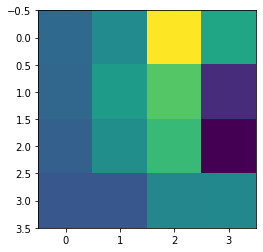

Convoluted channel :0
(4, 4)
(4, 4)


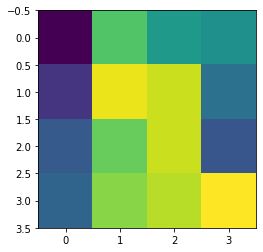

Convoluted channel :1


In [16]:
pred=model.predict(data)
pred=pred[0]
pred.shape

for i in range(pred.shape[-1]):
    viz=pred[:,:,i]
    print(viz.shape)
    viz=np.squeeze(viz)
    print(viz.shape)
    plt.imshow(viz)
    plt.show()
    print(f"Convoluted channel :{i}")